## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [23]:
# %tensorflow_version 2.x
import tensorflow
print(tensorflow.__version__)

1.15.0


In [0]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


### Find no.of samples are there in training and test datasets

No of samples in the train and test datasets are as follows:


In [26]:
x_train.shape[0]

60000

60000 records in training and 10000 records in test dataset respectively.


In [27]:
x_test.shape[0]

10000

In [28]:
y_train.shape[0]

60000

In [29]:
y_test.shape[0]

10000

### Find dimensions of an image in the dataset

In [30]:
x_train.shape[1:3]

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
from keras.utils import np_utils

In [0]:
y_train = np_utils.to_categorical(y_train, 10)

In [33]:
y_train.shape

(60000, 10)

In [0]:
y_test = np_utils.to_categorical(y_test, 10)

In [35]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

In [0]:
x_train /= 255
x_test /= 255

In [38]:
x_train.shape

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [40]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [43]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [44]:
model.fit(x_train,y_train,batch_size=200,nb_epoch=10,verbose=1,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 16s 275us/step - loss: 0.4470 - acc: 0.8403 - val_loss: 0.3428 - val_acc: 0.8785
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2818 - acc: 0.8978 - val_loss: 0.2853 - val_acc: 0.8964
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2324 - acc: 0.9146 - val_loss: 0.2767 - val_acc: 0.8979
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1976 - acc: 0.9274 - val_loss: 0.2567 - val_acc: 0.9082
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1676 - acc: 0.9377 - val_loss: 0.2461 - val_acc: 0.9154
Epoch 6/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.1425 - acc: 0.9476 - val_loss: 0.2431 - val_acc: 0.9146
Epoch 7/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.1155 - acc: 0.9583 - val_loss: 0.2703 

In [45]:
score=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 53us/step


In [46]:
score

[0.30799788723289967, 0.9149]

In [0]:
y_predict = model.predict(x_test)

In [48]:
y_predict[0]

array([1.10052998e-08, 3.15784942e-13, 1.05418344e-07, 2.70123618e-10,
       5.36173883e-11, 4.39598864e-07, 4.82682852e-11, 2.27290129e-05,
       2.74355358e-07, 9.99976516e-01], dtype=float32)

In [49]:
np.argmax(y_predict[0])

9

The above model gives an accuracy of 91%

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

In [51]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [52]:
model.add(Dropout(0.25))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [56]:
model.fit(x_train,y_train,batch_size=200,nb_epoch=10,verbose=1,validation_data=(x_test,y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.4977 - acc: 0.8221 - val_loss: 0.3636 - val_acc: 0.8686
Epoch 2/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.3162 - acc: 0.8871 - val_loss: 0.2975 - val_acc: 0.8951
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.2740 - acc: 0.9002 - val_loss: 0.2884 - val_acc: 0.8979
Epoch 4/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.2427 - acc: 0.9119 - val_loss: 0.2562 - val_acc: 0.9075
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.2180 - acc: 0.9207 - val_loss: 0.2614 - val_acc: 0.9067
Epoch 6/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.1969 - acc: 0.9277 - val_loss: 0.2310 - val_acc: 0.9160
Epoch 7/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.1810 - acc: 0.9335 - val_loss: 0.2245 - val_acc

In [57]:
score=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 52us/step


In [58]:
score

[0.22496229654848576, 0.9205]

In [0]:
y_predict = model.predict(x_test)

In [60]:
y_predict[0]

array([5.1247472e-08, 7.4202741e-11, 1.0348840e-07, 4.8235882e-10,
       4.1748835e-09, 3.1467855e-05, 1.9965523e-08, 1.1452058e-04,
       1.3253204e-07, 9.9985373e-01], dtype=float32)

In [61]:
np.argmax(y_predict[0])

9

The above model gives an accuracy of 92%

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False,  
    rotation_range=50,  
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    horizontal_flip=False, 
    vertical_flip=False) 
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

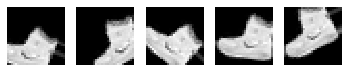

In [63]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [64]:
model.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
  12/1875 [..............................] - ETA: 23s - loss: 2.4773 - acc: 0.3307

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 21s 11ms/step - loss: 0.8652 - acc: 0.6801 - val_loss: 0.5045 - val_acc: 0.8218
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6743 - acc: 0.7499 - val_loss: 0.5227 - val_acc: 0.8083
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6221 - acc: 0.7687 - val_loss: 0.4784 - val_acc: 0.8332
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5766 - acc: 0.7861 - val_loss: 0.5170 - val_acc: 0.7969
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5558 - acc: 0.7938 - val_loss: 0.4682 - val_acc: 0.8363
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5348 - acc: 0.8036 - val_loss: 0.4625 - val_acc: 0.8411
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5239 - acc: 0.8070 - val_loss: 0.4242 - val_acc: 0.8507
Epoch 8/10
1875/1875 [==============================] - 21s

###  Report the final train and validation accuracy

In [65]:
model.evaluate(x_train, y_train)

60000/60000 [==============================] - 3s 51us/step


[0.400514527463913, 0.8546166666666667]

In [66]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 53us/step


[0.42328534932136536, 0.8558]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

### **Load CIFAR10 dataset**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [69]:
x_train.shape

(50000, 32, 32, 3)

In [70]:
x_test.shape

(10000, 32, 32, 3)

In [71]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')
x_train /= 255
x_test /= 255
# y_train = np_utils.to_categorical(y_train_num, 10)
# y_test = np_utils.to_categorical(y_test_num, 10)

print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False, 
    zca_whitening=False,  
    rotation_range=50,  
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False, 
    vertical_flip=False) 

### **Prepare/fit the generator.**

In [0]:
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

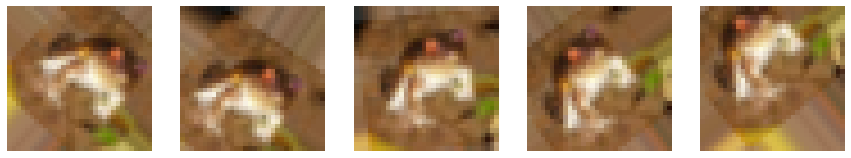

In [74]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()